In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    MinMaxScaler,
    StandardScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

import pandas as pd

df = pd.read_csv('/content/customer_churn.csv')

print(df.shape)
df.head()



(500, 9)


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [3]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


,0
CustomerID,0
Tenure,0
MonthlyCharges,0
TotalCharges,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
SeniorCitizen,0
Churn,0


In [4]:
df['Churn'].value_counts(dropna=False)


,count
Churn,
0,447
1,53


In [5]:
df = df[df['Churn'].notna()]   # remove rows where Churn is missing ONLY


In [6]:
df['Churn'] = df['Churn'].astype(int)


In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print(X.shape, y.shape)


(500, 8) (500,)


In [8]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)


Index(['Tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen'], dtype='object')
Index(['CustomerID', 'Contract', 'PaymentMethod', 'PaperlessBilling'], dtype='object')


In [9]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print(X.shape)


(500, 508)


In [10]:
from sklearn.preprocessing import MinMaxScaler

if X.shape[0] == 0:
    raise ValueError("Dataset has 0 rows. STOP.")

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(400, 508) (100, 508)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.89
[[89  0]
 [11  0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        89
           1       0.00      0.00      0.00        11

    accuracy                           0.89       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.79      0.89      0.84       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Accuracy: 0.92
[[89  0]
 [ 8  3]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        89
           1       1.00      0.27      0.43        11

    accuracy                           0.92       100
   macro avg       0.96      0.64      0.69       100
weighted avg       0.93      0.92      0.90       100



In [14]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importance.head(10)


,0
Tenure,0.327103
MonthlyCharges,0.061034
TotalCharges,0.059468
Contract_One year,0.028743
Contract_Two year,0.017673
CustomerID_C00263,0.013149
CustomerID_C00324,0.012019
CustomerID_C00424,0.011712
CustomerID_C00174,0.011685
CustomerID_C00390,0.011658


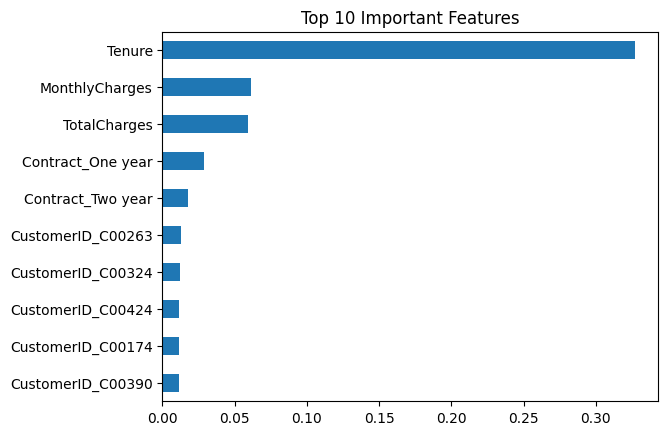

In [15]:
import matplotlib.pyplot as plt

importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [16]:
y.value_counts(normalize=True)


,proportion
Churn,
0,0.894
1,0.106


In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

y_train_bal.value_counts(normalize=True)


,proportion
Churn,
1,0.5
0,0.5


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_bal, y_train_bal)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.89      0.73      0.80        11

    accuracy                           0.96       100
   macro avg       0.93      0.86      0.89       100
weighted avg       0.96      0.96      0.96       100



In [19]:
from sklearn.metrics import roc_auc_score

y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)


np.float64(0.9948927477017365)

In [20]:
import pandas as pd

pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False).head(5)


,0
Tenure,0.428923
MonthlyCharges,0.053159
Contract_One year,0.035612
TotalCharges,0.034615
CustomerID_C00348,0.018261


In [25]:
df = pd.read_csv('/content/customer_churn.csv')
df = df[df['Churn'].notna()]
df['Churn'] = df['Churn'].astype(int)


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [27]:
X_train.select_dtypes(include='object').columns


Index(['CustomerID', 'Contract', 'PaymentMethod', 'PaperlessBilling'], dtype='object')

In [28]:
target_encode_col = X_train.select_dtypes(include='object').columns[0]


In [29]:
train_temp = X_train.copy()
train_temp['Churn'] = y_train

target_map = train_temp.groupby(target_encode_col)['Churn'].mean()


In [30]:
global_mean = y_train.mean()

X_train[target_encode_col + '_TE'] = X_train[target_encode_col].map(target_map).fillna(global_mean)
X_test[target_encode_col + '_TE'] = X_test[target_encode_col].map(target_map).fillna(global_mean)


In [31]:
X_train.drop(columns=[target_encode_col], inplace=True)
X_test.drop(columns=[target_encode_col], inplace=True)


In [32]:
print(X_train.shape)
print(X_test.shape)

X_train.head()


(400, 8)
(100, 8)


,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,CustomerID_TE
251,9,138,515,Two year,Credit Card,No,0,1.0
182,56,151,735,Two year,Credit Card,Yes,1,0.0
72,13,125,3696,Two year,Credit Card,No,1,0.0
374,29,20,4628,One year,Bank Transfer,Yes,1,0.0
139,2,184,5021,One year,Electronic Check,Yes,1,1.0


In [33]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()


(np.int64(0), np.int64(0))

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [37]:
remaining_cat_cols = ['Contract', 'PaymentMethod', 'PaperlessBilling']

X_train = pd.get_dummies(X_train, columns=remaining_cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=remaining_cat_cols, drop_first=True)



In [38]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [39]:
X_train.select_dtypes(include='object').columns


Index([], dtype='object')

In [40]:
X_train.isna().sum().sum()


np.int64(0)

In [42]:
X_train.shape, X_test.shape



((400, 10), (100, 10))

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [44]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        89
           1       0.00      0.00      0.00        11

    accuracy                           0.89       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.79      0.89      0.84       100

ROC-AUC: 0.9918283963227783


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
